<a href="https://colab.research.google.com/github/rajdipj/ML/blob/main/DL_f_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [ ]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

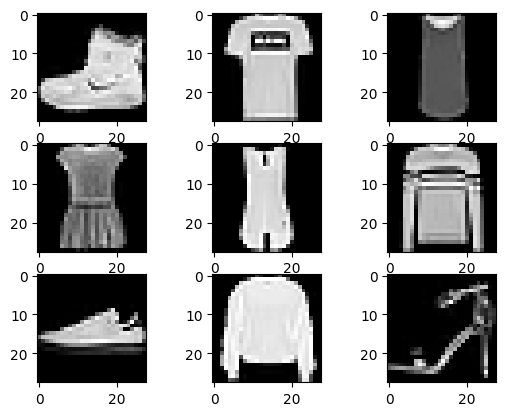

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Have to scale the data cus dataset includes integers range from 0 to 255. To scale we will devided the values with 255

In [ ]:
X_train, X_valid, X_test = X_train/255. , X_valid/255., X_test/255.

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

There are two types of models in tenserflow, sequential model and functional model. Here, we will go with sequential model, which means we will add layers to the model in sequence.

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())#input layer is 1 dimentional and the data we are enetering is 2d data(28x28), so we have to convert the 2d data to 1d data by using Flatten(). it is a non trainable layer so blank().
model.add(tf.keras.layers.Dense(300, activation = 'relu'))# Dens means all the nurons are connect to each other, means fully connected model. here we are creating 300 nurons in this layers and activation function is relu
model.add(tf.keras.layers.Dense(100, activation = 'relu'))#in this layer we are creating 100 nurons
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))#this is output layers. 10 nurons cus there are 10 class, and since relu cant give probability, we are using softmax activation function.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(784*300) + 300

235500

In [ ]:
hiddenl = model.layers[1]
weights, biases = hiddenl.get_weights()
weights

array([[-0.04037208, -0.06830076, -0.00511194, ...,  0.05417632,
         0.02547999,  0.07274325],
       [-0.06352014, -0.04517227,  0.01794558, ...,  0.06433108,
         0.06285642,  0.05721284],
       [-0.02370748,  0.06278647,  0.00534122, ..., -0.0534272 ,
         0.01854576, -0.04671072],
       ...,
       [ 0.0287317 ,  0.01188248,  0.04809702, ...,  0.04678258,
         0.03706298, -0.00792465],
       [-0.05422235, -0.02018642,  0.04091699, ..., -0.05475377,
         0.03628564,  0.04069727],
       [-0.02637633,  0.02722927,  0.05048147, ..., -0.01985733,
        -0.01226189, -0.06149419]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',#sticastuc gradient desent
              metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train,y_train, epochs = 30, validation_data = (X_valid, y_valid) )

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.6923 - accuracy: 0.7736 - val_loss: 0.5048 - val_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4807 - accuracy: 0.8342 - val_loss: 0.4578 - val_accuracy: 0.8364
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4354 - accuracy: 0.8483 - val_loss: 0.4246 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4118 - accuracy: 0.8564 - val_loss: 0.3938 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3913 - accuracy: 0.8637 - val_loss: 0.3902 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3758 - accuracy: 0.8689 - val_loss: 0.3967 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3638 - accuracy: 0.8719 - val_loss: 0.3772 - val_accuracy

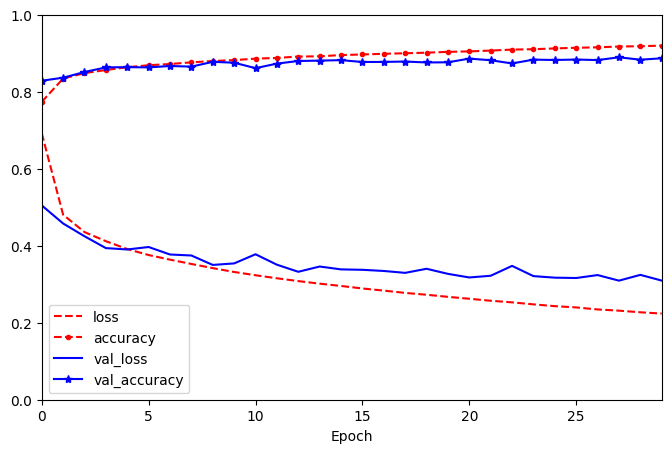

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8,5), xlim = [0,29], ylim = [0,1], xlabel = 'Epoch', style = ['r--', 'r--.', 'b-','b-*'])
plt.show()

AS we can see after approx 13 epochs training training loss is going exponentially down so no point keeping somany epocs. Also, we can see validation accuracy remains constant and no improvment after approx 13 epoches.

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8860


[0.3258354067802429, 0.8859999775886536]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 122ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1])

if we compare the two, the answere is 9th index in the first row, 2nd index in 2nd row and 1st index in the theird row.

Now, lets name them from the basis of class_names

In [ ]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

in case of regression problem, there will be no input layer but we will use Normalization layer. We used standard scaler by dividing values by 255 in classification problem above. in regression, input shape will be the number of columns.

In [ ]:
#norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
# then we will add dence layers except the last one. The last dense layer will nave 1 nuron cus we have to predict a single number.
#las_layer = tf.keras.layers.Dense(1) also no activation function required cus we just need the value as it is
#loss = 'mse', metrics = ['RootMeanSquaredError']
#usually traditional models are better for regression problem cus ANN models are like black box, non interepretable.